In [1]:
import Starfish

In [6]:
start = Starfish.config["Theta"]

In [9]:
keys = start.keys()

In [12]:
"teff2" in keys

True

In [14]:
import numpy as np

In [15]:
p0 = np.array(start["grid"] + [start["vz"], start["vsini"], start["logOmega"]])

In [16]:
p0

array([  6.30000000e+03,   4.19000000e+00,  -3.10000000e-01,
        -4.75122000e+00,   6.69350000e+00,  -1.26949000e+01])

In [18]:
np.append(p0, 7)

array([  6.30000000e+03,   4.19000000e+00,  -3.10000000e-01,
        -4.75122000e+00,   6.69350000e+00,  -1.26949000e+01,
         7.00000000e+00])

In [19]:
p0

array([  6.30000000e+03,   4.19000000e+00,  -3.10000000e-01,
        -4.75122000e+00,   6.69350000e+00,  -1.26949000e+01])

# Examine CC components

From `parallel.py` in the `evaluate(self)` function:

```python
        part1 = X.dot(self.C_GP.dot(X.T))
        part2 = X.dot(self.C_GP2.dot(X.T))
        part3 = self.data_mat
        
        np.save("part1.npy", part1)
        np.save("part2.npy", part2)
        np.save("part3.npy", part3)
        #CC = X.dot(self.C_GP.dot(X.T)) + self.data_mat
        CC = part1 + part2 + part3
```

In [32]:
part1 = np.load("part1.npy")
part2 = np.load("part2.npy")
part3 = np.load("part3.npy")

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

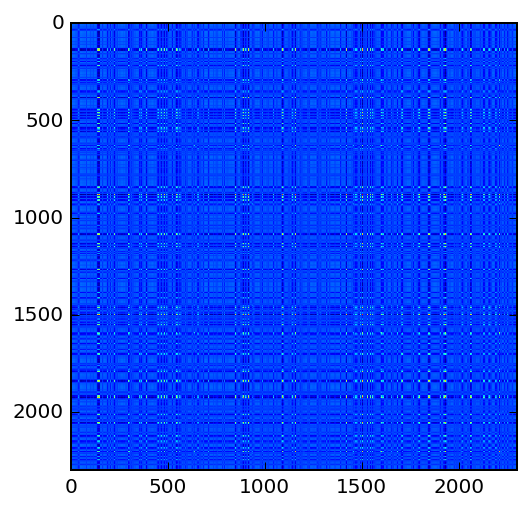

In [33]:
plt.imshow(part1)

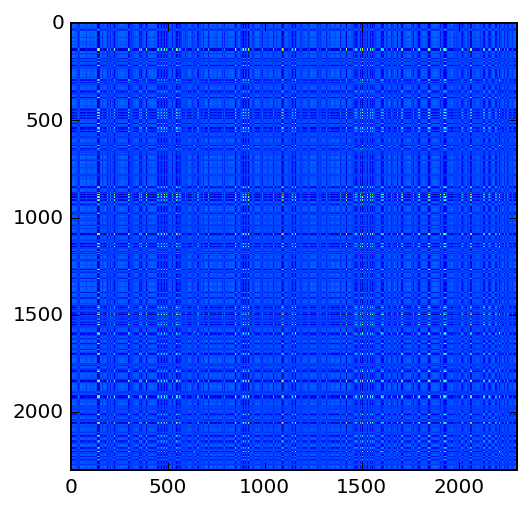

In [34]:
plt.imshow(part2)

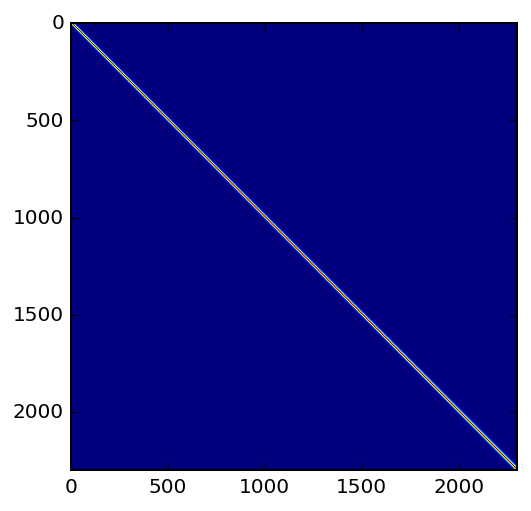

In [36]:
plt.imshow(part3)

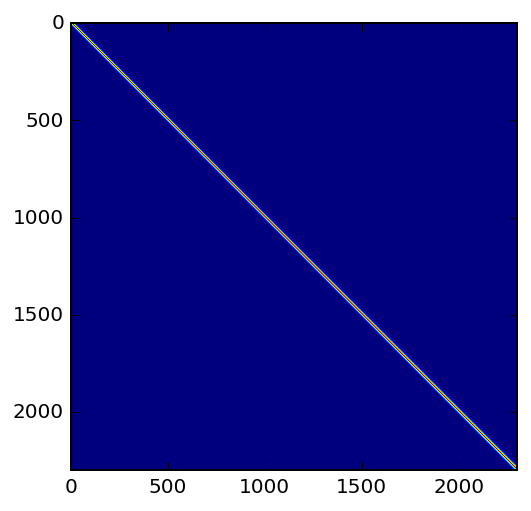

In [37]:
plt.imshow(part1 + part2 + part3)

In [40]:
jump = Starfish.config["Theta_jump"]
cov = np.diag(np.array(jump["grid"] + [jump["vz"], jump["vsini"], jump["logOmega"]] + [jump["grid"][0]])**2)